# Exploratory data analysis with pandas

In the first half of this class we learned how to read and manipulate text. Now we're going to start to learn how to handle tabular data.

For this purpose we'll use a module called ```pandas```, which allows us to treat a whole table as a single data object. By convention we read it in to the alias ```pd```, which becomes a short nickname.

We're also going to import a module called numpy, although we won't discuss numpy very much until next week. The import statements below will very commonly begin your Python programs for data analysis.

In [4]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## I. Reading tables

First let's read in a sample of tabular data. This happens to be a dataset created for FiveThirtyEight that has rows for various movies in the years 2014 and 2015, and columns that indicate how each movie was rated by, for instance, Rotten Tomatoes, Metacritic, and Fandango. First we'll use the ```os``` module to create a relative path, as we did with text files. In this case, the file name ends with '.csv,' because it's a "comma-separated" file.

In [2]:
import os
relativepath = os.path.join('..', 'data', 'fivethirtyeight', 'fandango.csv')
print(relativepath)

../data/fivethirtyeight/fandango.csv


Now let's read in the whole table. The pandas module makes this amazingly simple. We will end up with a variable, movies, that is an example of a pandas ```DataFrame```, as we can see by printing out its ```type()```.

In [5]:
movies = pd.read_csv(relativepath)
print(type(movies))
print(movies.shape)

<class 'pandas.core.frame.DataFrame'>
(146, 23)


DataFrames have an attribute ```.shape```. An attribute is different from a method, in that it can't take an argument, and doesn't require ```()``` parentheses. ```Shape``` will just be a tuple that indicates

    number_of_rows, number_of_columns

If we want to know the column names,

In [8]:
print(movies.columns.values)

['film' 'year' 'rottentomatoes' 'rottentomatoes_user' 'metacritic'
 'metacritic_user' 'imdb' 'fandango_stars' 'fandango_ratingvalue' 'rt_norm'
 'rt_user_norm' 'metacritic_norm' 'metacritic_user_nom' 'imdb_norm'
 'rt_norm_round' 'rt_user_norm_round' 'metacritic_norm_round'
 'metacritic_user_norm_round' 'imdb_norm_round'
 'metacritic_user_vote_count' 'imdb_user_vote_count' 'fandango_votes'
 'fandango_difference']


You can print out the first few rows using the ```head()``` method to get a sense of the data, though that isn't terribly pretty with a DataFrame like this one that has 23 columns!

In [75]:
print(movies.head(5))

                      film  year  rottentomatoes  rottentomatoes_user  \
0  Avengers: Age of Ultron  2015              74                   86   
1               Cinderella  2015              85                   80   
2                  Ant-Man  2015              80                   90   
3          Do You Believe?  2015              18                   84   
4   Hot Tub Time Machine 2  2015              14                   28   

   metacritic  metacritic_user  imdb  fandango_stars  fandango_ratingvalue  \
0          66              7.1   7.8             5.0                   4.5   
1          67              7.5   7.1             5.0                   4.5   
2          64              8.1   7.8             5.0                   4.5   
3          22              4.7   5.4             5.0                   4.5   
4          29              3.4   5.1             3.5                   3.0   

   rt_norm         ...           imdb_norm  rt_norm_round  rt_user_norm_round  \
0     3.70 

### Exercise 1. Finding the name of the film with the highest/lowest score.

You can extract a column from a DataFrame using the syntax 

    DataFrame['column_name']

So, for instance, 

    movies['imdb']

will give us all the imdb scores for the movies. To find the position of the maximum score you can say


In [9]:
movies['film'][movies['rottentomatoes'].idxmin()]

'Paul Blart: Mall Cop 2'

But that's not very helpful. What we really want is the *title* of the movie. 

How would we get the title? Well, a column of a DataFrame is not *exactly* the same thing as an ordinary Python list, but it's loosely analogous. (We'll explain the differences in our next class.) So we basically have a list of titles available in ```movies['film']```. 

Use what you already know about indexing Python lists to guess how to find the name of the film with the highest imdb score. You can edit the cell above.

## II. Visualizing the distribution of values in a column

One of the nice things about pandas DataFrames is that they have some very convenient visualization options built in via a ```plot()``` method. [(A full tutorial is linked here.)](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html) For instance, if you want to quickly grasp the distribution of scores in a particular column, you can plot a histogram, where the y axis shows the number of rows where the value for that column falls within a particular bin.

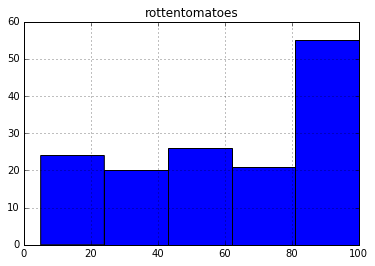

In [10]:
movies.hist('rottentomatoes', bins = 5)
plt.show()

We can see that rottentomatoes scores bunch up a bit at the high end.

We can also print boxplots, which indicate the four quartiles of a distribution. 


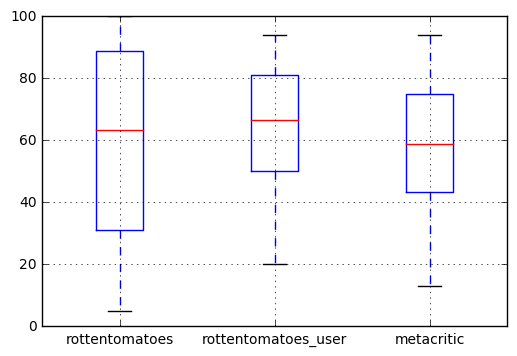

In [55]:
movies.boxplot(column = ['rottentomatoes', 'rottentomatoes_user', 'metacritic'], return_type = 'axes')
plt.show()

## III. Visualizing relationships between columns

We use the same boxplot function to divide one column up according to the values of another. For instance, let's look at the distribution of metacritic scores for films that got different numbers of fandango stars.

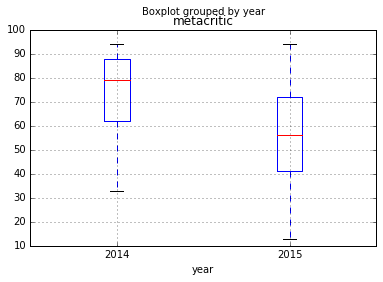

In [11]:
movies.boxplot(column = ['metacritic'], by ='year')
plt.show()

This plot is nice and manageable because Fandango rounds to the half-star -- and never gives anything less than three stars! The plot would become awkward, however, if ```fandango_stars``` had a wider range of values. To see what I mean, edit the ```by``` value above so you're breaking ```metacritic``` up by the value of ```imdb```.

To handle the relations of two continuous variables, it is usually more intuitive to use a scatterplot. This allows us to plot films, for instance, in a space where the x axis is defined by imdb scores and the y axis is defined by metacritic scores.

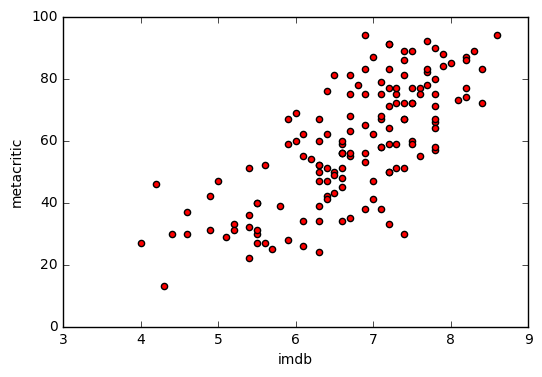

In [67]:
movies.plot(kind = 'scatter', x = 'imdb', y = 'metacritic', color = 'r', marker = 'o')
plt.show()

### Exercise 2: Explore relationships between columns.

Play around with different columns in the scatter plot above, to see if you can find which movie rating systems are most closely correlated with each other.

Once you're done, it might be nice to test your hypothesis. The strength of a linear relationship between two variables can be represented as a *correlation coefficient.* We'll be calculating the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) between pairs of columns. The code below gives you an example of how to calculate this. Note that you can select a column from a DataFrame using the syntax

    dataframe['columnname']


In [74]:
from scipy.stats.stats import pearsonr
coef = pearsonr(movies['imdb'], movies['imdb_user_vote_count'])
print(coef)
print(movies['film'][movies['imdb'].idxmin()])

(0.23005809210563283, 0.0052144258631183129)
Fantastic Four


The ```pearsonr``` function returns a 2-tuple where the first element is the correlation coefficient. The linear relationship between two variables when the coefficient is close to 1 (positively correlated) or -1 (negatively correlated). A coefficient close to zero indicates weak correlation.

The second element in the 2-tuple is a ```p``` value. We'll talk more about these next time.

## IV. The exploratory part of EDA.

Exploration is difficult to reduce to a formula, but there are a few tricks that are very commonly useful. For instance, you often need to be wary of the assumption that relationships are linear. Some variables have an exponential distribution, and they will initially be hard to visualize.

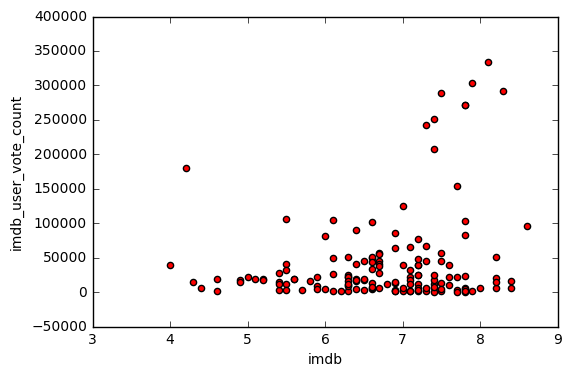

In [69]:
movies.plot(kind = 'scatter', x = 'imdb', y = 'imdb_user_vote_count', color = 'r', marker = 'o')
plt.show()

In a case like this you might want to transform one or both variables, for instance by taking the logarithm of ```user_vote_count``` here. We can do this by importing the ```math``` module.

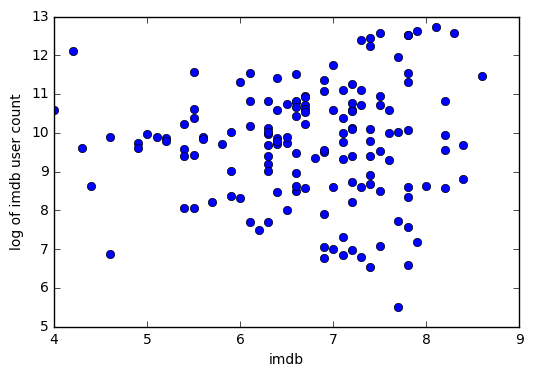

In [70]:
import math

loguser = [math.log(x) for x in movies['imdb_user_vote_count']]
# remember our friend the list comprehension?

plt.plot(movies['imdb'], loguser, 'bo')
# because one of the axes is no longer a column of the original dataframe, we
# have to go back to plt.plot() instead of using a method that belongs to DataFrames

plt.xlabel('imdb')
plt.ylabel('log of imdb user count')
plt.show()

While we might initially be tempted to see a linear relationship between vote-count and the mean imdb score, the log-transformed scatterplot suggests that something more complex might be going on. Films with very low (as well as very high) vote counts are likely to get high imdb scores. We had to take the log to see this, because the difference between low and very-low vote counts was invisible in our first scatterplot. 

### Exercise 3: Apply what we've learned on a new dataset.

In the ```fivethirtyeight``` folder, there is also a file ```librarians.csv``` that organizes data about library jobs per capita. Using snippets of code from the discussion above, load this dataset as a DataFrame, and use the boxplot method to visualize the ```jobs_1000``` column broken up by state (```prim_state```).

The boxplot will initially be congested, because fifty states are lot. You may need to add ```figsize=(12,6)``` as a keyword argument inside the ```boxplot()``` call in order to stretch the x axis a bit.

In [71]:
## code for Exercise 2 would go here